In [3]:
! git clone https://github.com/misbah4064/face_mask_detection.git
%cd face_mask_detection

Cloning into 'face_mask_detection'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 15 (delta 1), reused 0 (delta 0), pack-reused 12 (from 1)
Receiving objects: 100% (15/15), 17.13 MiB | 31.33 MiB/s, done.
Resolving deltas: 100% (1/1), done.
/content/face_mask_detection


In [6]:
# =========================
# STEP 1: Install dependencies
# =========================
!pip install opencv-python tensorflow

# =========================
# STEP 2: Import libraries
# =========================
import cv2
import numpy as np
import os
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from google.colab.patches import cv2_imshow
from google.colab import files

# =========================
# STEP 3: Upload required files
# =========================
print("👉 Please upload your trained model (mask_recog.h5) and a test image.")
uploaded = files.upload()

# After uploading, check the files
print("Uploaded files:", list(uploaded.keys()))

# =========================
# STEP 4: Load model and Haarcascade
# =========================
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_alt2.xml")
model = load_model("mask_recog.h5")  # must be uploaded above

# =========================
# STEP 5: Define face mask detector function
# =========================
def face_mask_detector(frame):
    if frame is None:
        print("❌ Error: Frame is empty.")
        return None

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(60, 60),
        flags=cv2.CASCADE_SCALE_IMAGE
    )

    for (x, y, w, h) in faces:
        # Extract face ROI
        face_frame = frame[y:y+h, x:x+w]
        face_frame = cv2.cvtColor(face_frame, cv2.COLOR_BGR2RGB)
        face_frame = cv2.resize(face_frame, (224, 224))
        face_frame = img_to_array(face_frame)
        face_frame = np.expand_dims(face_frame, axis=0)
        face_frame = preprocess_input(face_frame)

        # Prediction
        (mask, withoutMask) = model.predict(face_frame)[0]

        # Label & Color
        label = "Mask" if mask > withoutMask else "No Mask"
        color = (0, 255, 0) if label == "Mask" else (0, 0, 255)
        label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)

        # Draw annotations
        cv2.putText(frame, label, (x, y - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)
        cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)

    return frame

# =========================
# STEP 6: Run detection on uploaded image
# =========================
# Replace "your_image.jpg" with the exact uploaded filename
image_path = list(uploaded.keys())[0]  # take first uploaded image
img = cv2.imread(image_path)

if img is None:
    print("❌ Could not load the image. Check filename.")
else:
    output = face_mask_detector(img)
    if output is not None:
        cv2_imshow(output)

👉 Please upload your trained model (mask_recog.h5) and a test image.


Saving archive (3).zip to archive (3).zip
Uploaded files: ['archive (3).zip']


❌ Could not load the image. Check filename.


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


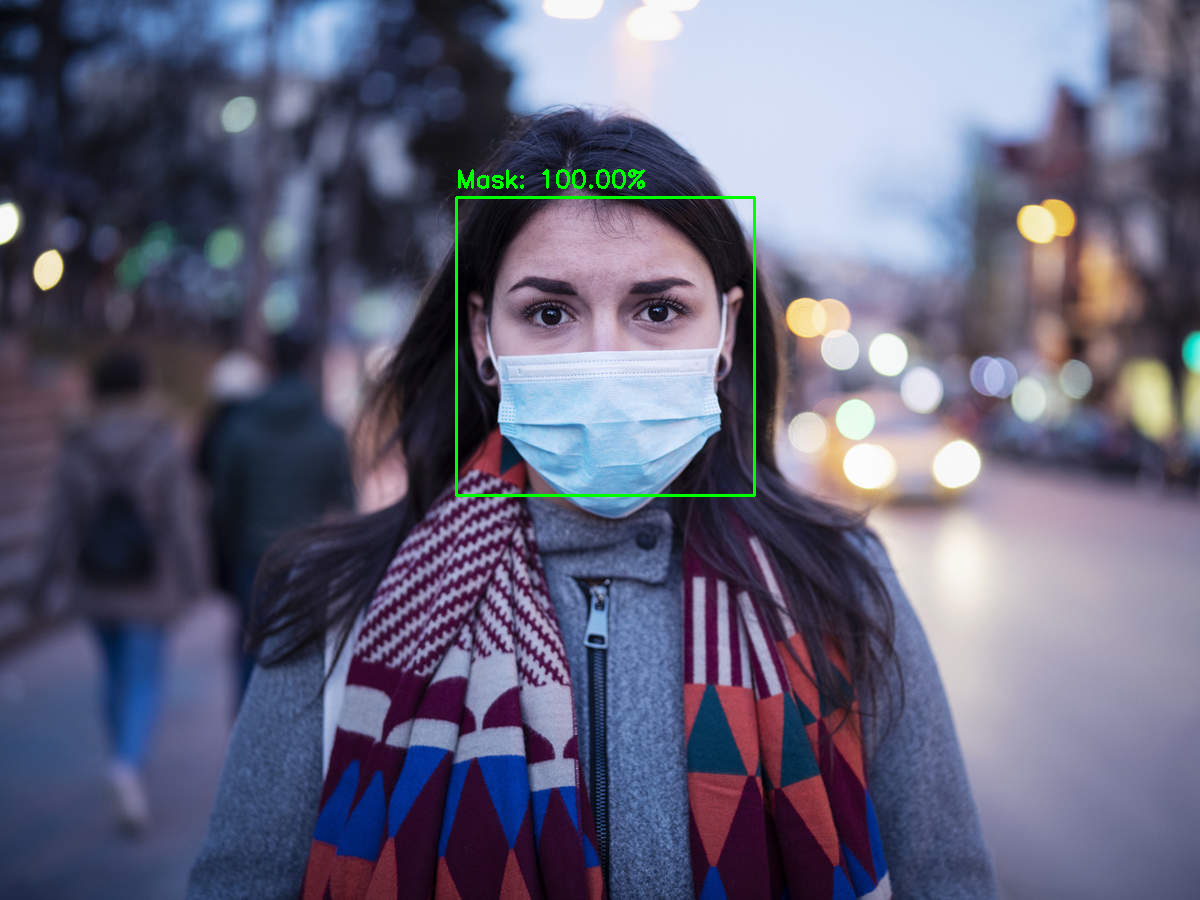

In [7]:
input_image = cv2.imread("image.jpg")
output = face_mask_detector(input_image)
cv2_imshow(output)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


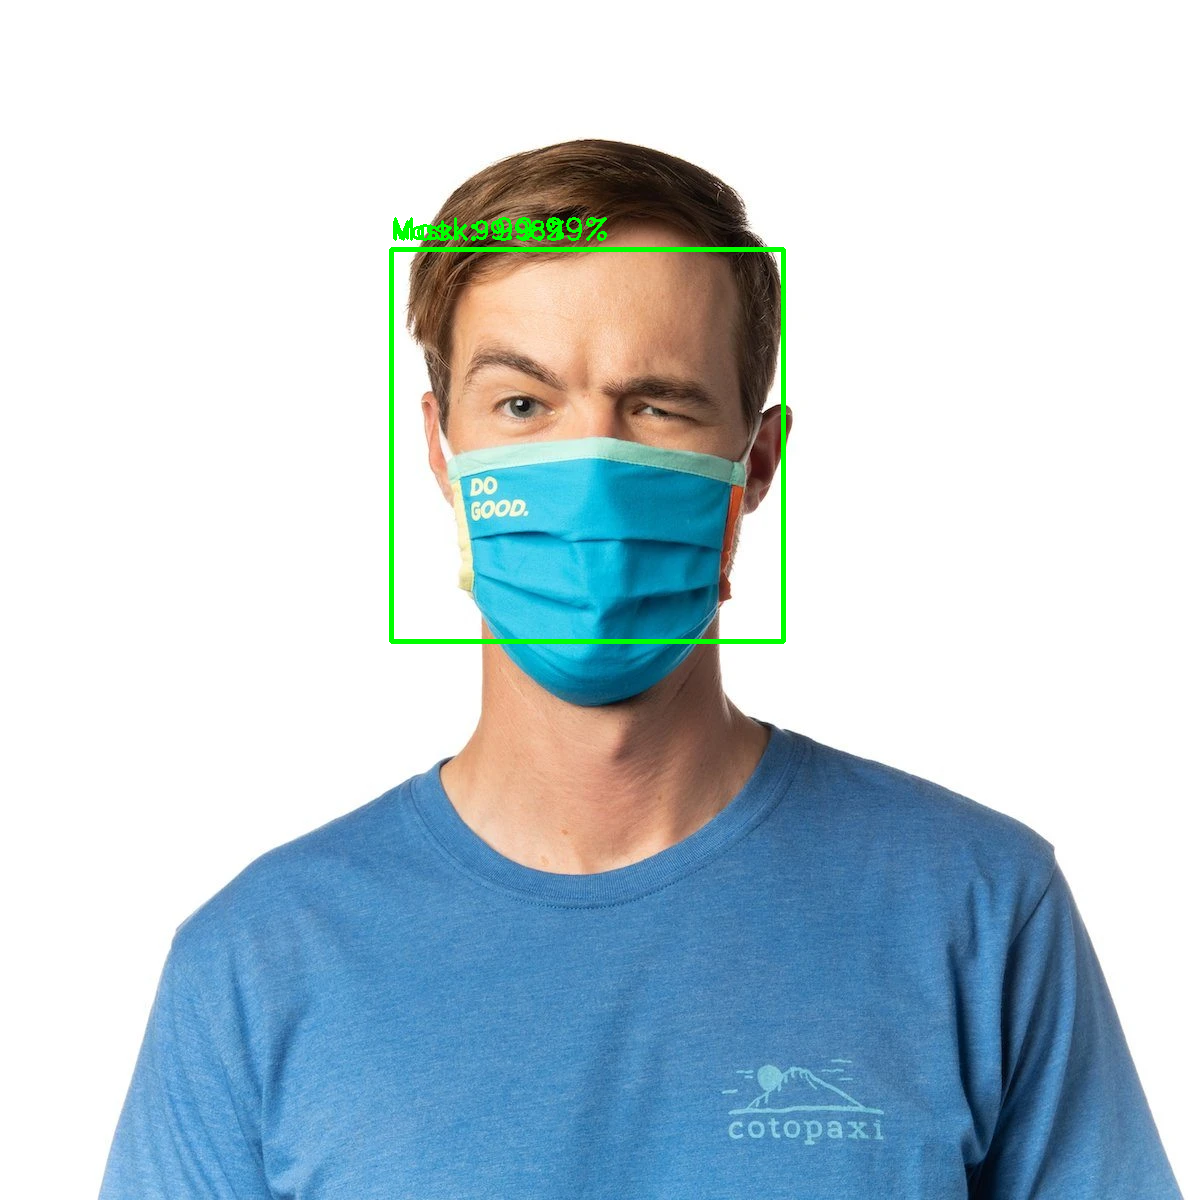

In [8]:
input_image = cv2.imread("image2.png")
output = face_mask_detector(input_image)
cv2_imshow(output)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


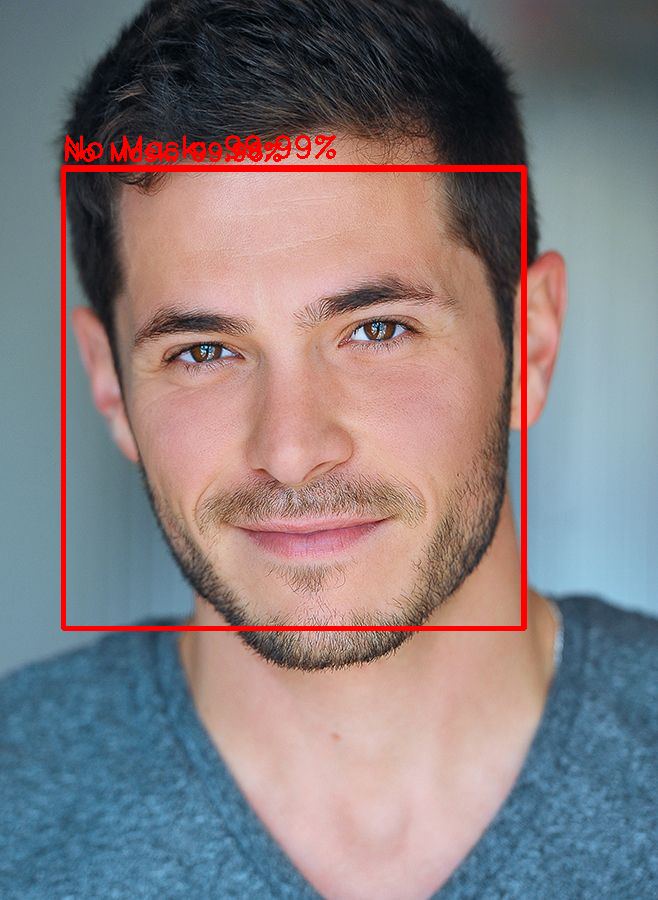

In [9]:
input_image = cv2.imread("image3.png")
output = face_mask_detector(input_image)
cv2_imshow(output)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


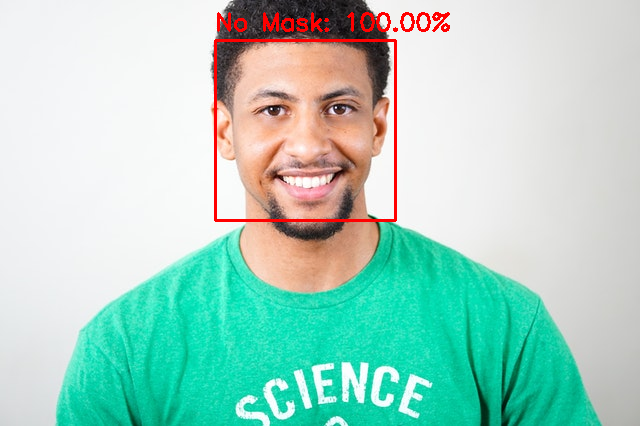

In [10]:
input_image = cv2.imread("image4.jpg")
output = face_mask_detector(input_image)
cv2_imshow(output)

In [11]:
cap = cv2.VideoCapture('video.mp4')
ret, frame = cap.read()
frame_height, frame_width, _ = frame.shape
out = cv2.VideoWriter('output.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))
print("Processing Video...")
while cap.isOpened():
  ret, frame = cap.read()
  if not ret:
    out.release()
    break
  output = face_mask_detector(frame)
  out.write(output)
out.release()
print("Done processing video")

Processing Video...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━